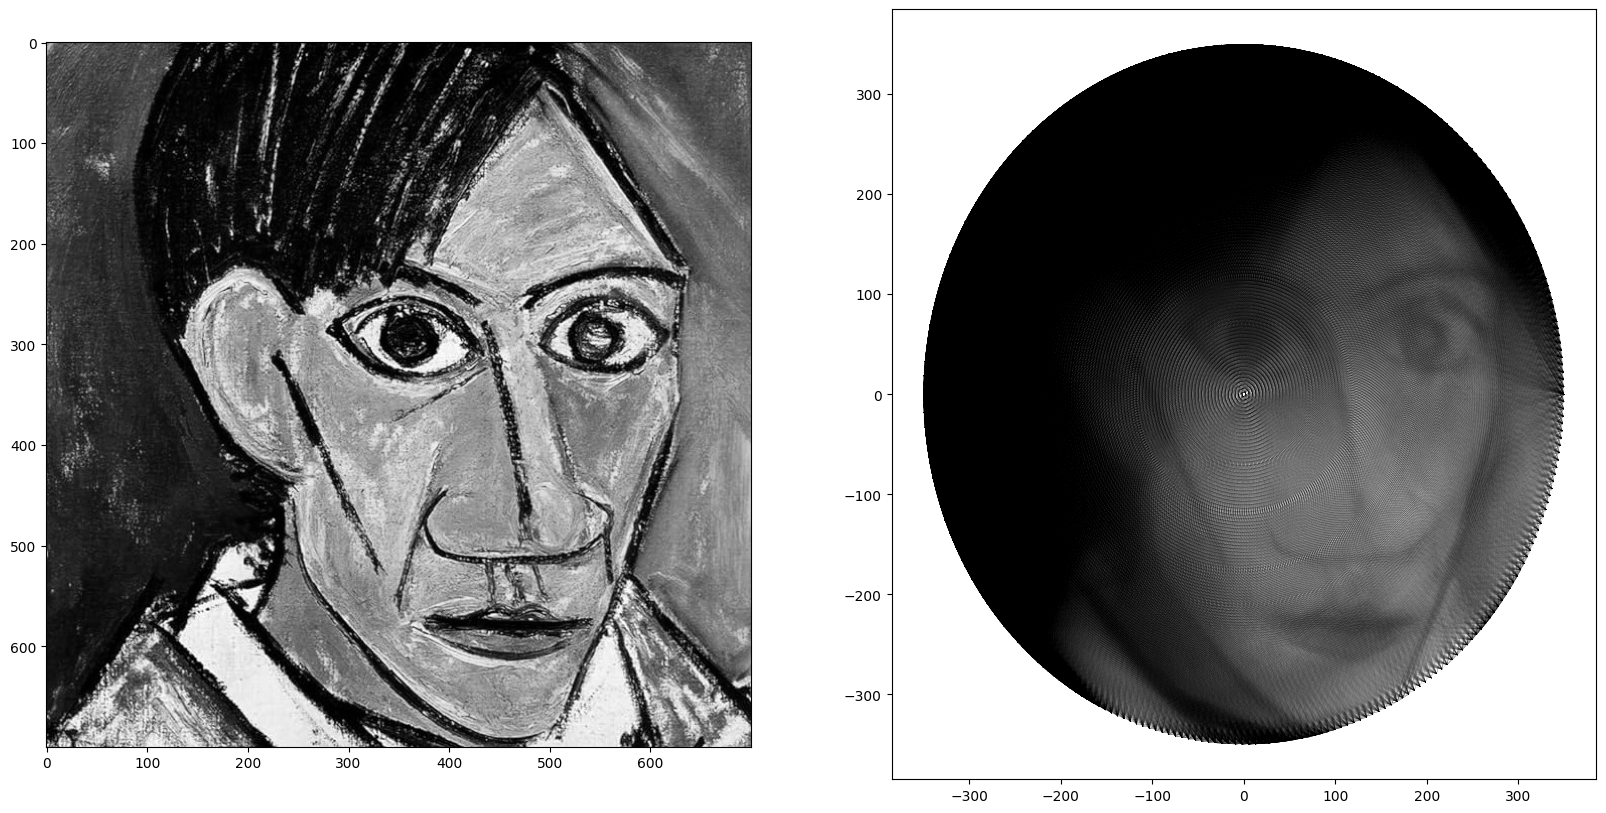

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

pil_image = Image.open("picasso.jpg").convert("L")
image = np.array(pil_image).astype(np.float32) / 255.0
fig, (image_ax, string_ax) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
image_ax.imshow(image, cmap="grey")  # 1 is white, 0 is black.

RADIUS = 350
N_POINTS = 300
angles = np.linspace(0, 2*np.pi, N_POINTS)
xs = RADIUS * np.cos(angles)
ys = RADIUS * np.sin(angles)

string_weights = np.empty((N_POINTS * (N_POINTS - 1)) // 2)
c = 0
for i in range(N_POINTS):
    for j in range(i+1, N_POINTS):
        x0, y0 = xs[i], ys[i]
        x1, y1 = xs[j], ys[j]
        
        dx, dy = (x1-x0), (y1-y0)
        dist = (dx**2.0 + dy**2.0) ** 0.5
        
        dists = np.linspace(0, dist, 100)
        x = x0 + dx / dist * dists
        y = y0 + dy / dist * dists

        cols = (RADIUS + x).astype(np.int32).clip(0, 2*RADIUS - 1)
        rows = (RADIUS - y).astype(np.int32).clip(0, 2*RADIUS - 1)

        string_weights[c] = (1-image[rows, cols]).mean()  # 1-pix b/c we want black to be high weight.
        c += 1

string_weights -= np.percentile(string_weights, 20)
string_weights = np.minimum(np.percentile(string_weights, 90), string_weights)
string_weights /= string_weights.max()

c = 0
for i in range(N_POINTS):
    for j in range(i+1, N_POINTS):
        if string_weights[c] > 0:
            string_ax.plot([xs[i], xs[j]], [ys[i], ys[j]], alpha=string_weights[c], c="black", linewidth=0.1)
        c += 1